<a href="https://colab.research.google.com/github/anewmur/ML_for_OilGas/blob/master/cnn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist 
from keras.models import Model 
from keras.layers import Dense, Dropout, Flatten
from keras.utils import np_utils 
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
from keras import backend as K
import sys


Using TensorFlow backend.


In [0]:
height, width, depth = 28, 28, 1 # MNIST images are 28x28 and greyscale
num_classes = 10 # there are 10 classes (1 per digit)

(X_train, y_train), (X_test, y_test) = mnist.load_data() # fetch MNIST data

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
num_train=len(X_train)
num_test=len(X_test)
num_test

10000

In [0]:
height, width = X_train[0].shape

depth=1
num_classes = 10

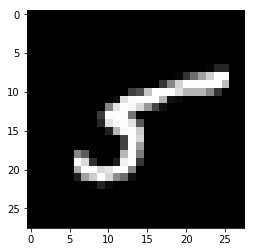

In [0]:
index = 65          
number_pic = X_train[index, :, :]
number_pic_p = np.expand_dims(number_pic, axis=0)

X_train_pic = np.expand_dims(number_pic, axis=2)
X_train_pic = np.repeat(X_train_pic, 3, 2)
plt.imshow(X_train_pic)
plt.show()

In [0]:
X_train[0].shape

(28, 28)

In [0]:
X_train = X_train.reshape(X_train.shape[0], height, width, 1)
X_test = X_test.reshape(X_test.shape[0], height, width, 1)
input_shape = (height, width, 1)
X_train[0].shape

(28, 28, 1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 # Normalise data to [0, 1] range
X_test /= 255 # Normalise data to [0, 1] range

In [0]:
Y_train = np_utils.to_categorical(y_train, num_classes) # One-hot encode the labels
Y_test = np_utils.to_categorical(y_test, num_classes) # One-hot encode the labels

In [0]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
#for _ in range(5): 
indexes = np.random.permutation(len(X_train))

indexes

array([ 7320, 56738, 31052, ...,  7302, 17135, 16155])

In [0]:
X_train  = X_train[indexes]
Y_train  = Y_train [indexes]

In [0]:
val_perc = 0.10
val_count = int(val_perc * len(X_train))

# first pick validation set from train_data/labels
val_data = X_train[:val_count,:]
val_labels = Y_train[:val_count,:]

# leave rest in training set
X_train2 = X_train[val_count:,:]
Y_train2 = Y_train[val_count:,:]

In [0]:
from keras.layers.normalization import BatchNormalization

def build_model():
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',
                     input_shape=(height, width, depth)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))

    
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')) 
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))    
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
   
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_model()
print(model.summary())

W0726 10:44:38.196580 140521294198656 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
__________

In [0]:
# model.compile(loss='categorical_crossentropy',
#               optimizer='adam', 
#               metrics=['accuracy']) 

In [0]:
results = model.fit(X_train2, Y_train2, 
                    epochs=15, batch_size=128,
                    validation_data=(val_data, val_labels))

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 6s 102us/step - loss: 0.1918 - acc: 0.9403 - val_loss: 0.0541 - val_acc: 0.9830
Epoch 2/15
54000/54000 [==============================] - 4s 82us/step - loss: 0.0596 - acc: 0.9810 - val_loss: 0.0475 - val_acc: 0.9858
Epoch 3/15
54000/54000 [==============================] - 4s 81us/step - loss: 0.0455 - acc: 0.9855 - val_loss: 0.0358 - val_acc: 0.9887
Epoch 4/15
54000/54000 [==============================] - 4s 81us/step - loss: 0.0349 - acc: 0.9890 - val_loss: 0.0316 - val_acc: 0.9900
Epoch 5/15
54000/54000 [==============================] - 4s 81us/step - loss: 0.0319 - acc: 0.9896 - val_loss: 0.0388 - val_acc: 0.9883
Epoch 6/15
54000/54000 [==============================] - 4s 81us/step - loss: 0.0282 - acc: 0.9907 - val_loss: 0.0305 - val_acc: 0.9927
Epoch 7/15
54000/54000 [==============================] - 4s 81us/step - loss: 0.0254 - acc: 0.9917 - val_loss: 0.0269 - val_acc

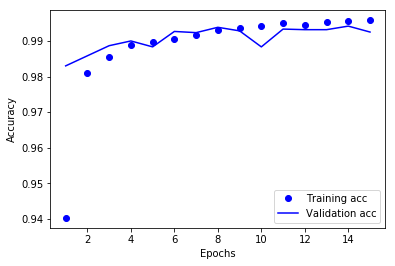

In [0]:
history_dict = results.history
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

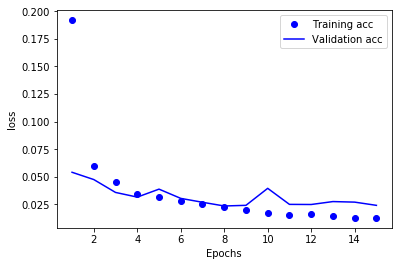

In [0]:
history_dict = results.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training acc')
plt.plot(epochs, val_loss_values, 'b', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [0]:
rez_loss, rez_acc = model.evaluate(X_test, Y_test, verbose=1) # Evaluate the trained model on the test set!
print(rez_loss, rez_acc)

10000/10000 [==============================] - 1s 81us/step
0.026486328473580217 0.9926


In [0]:
number_pic_p1 = np.expand_dims(number_pic_p, axis=3)
rez_pred = model.predict(number_pic_p1)
np.argmax(rez_pred)

5